# Overview

This report will present the process and result of exploring and analyzing records regarding baseball team from the year of 1871 to 2015 sourced from http://www.seanlahman.com/baseball-archive/statistics/.

Asked some questions below and 
These interesting points discovered through the data.

* Which teams are strong over time?

* What features are significantly related the teams' performance?


--http://kin.naver.com/qna/detail.nhn?d1id=10&dirId=100102&docId=41406992&qb=T3V0cyBQaXRjaGVk&enc=utf8&section=kin&rank=1&search_sort=0&spq=0&pid=Sy59AlpySEhssbvcRYhssssssus-328272&sid=ydu4NuswD6uTwP8L/cqlvg%3D%3D

# Loading and Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# load "Team" record
team_df = pd.read_csv("Teams.csv")
print "shape of the data: ", team_df.shape
print team_df.head(3)
#print team_df.describe()

print team_df['lgID'][team_df['lgID']=='NA']

Populating the interactive namespace from numpy and matplotlib
shape of the data:  (2805, 48)
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19     ...        

   DP    FP                     name                          park  \
0 NaN  0.83     Boston Red Stockings           South End Grounds I   
1 NaN  0.82  Chicago White Stockings       Union Base-Ball Grounds   
2 NaN  0.81   Cleveland Forest Citys  National Association Grounds   

   attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0         NaN  103   98       BOS             BS1          BS1  
1         NaN  104  102       CHI             CH1          CH1  
2         NaN   96  100       CLE             CL1          CL1  

[3 rows x 48 columns]
Series([], Name: lgID, dtype:

In [2]:
# load "Team description" data
with open('Teams_table_desc.txt', 'r') as f:
    features = f.readlines()

# features description dictionary
from collections import defaultdict

features_dict = defaultdict(list)
for feature in features:
    splited =  feature.split()
    key = splited[0]
    value = ' '.join(splited[1:len(splited)])
    features_dict[key] = value

for key in features_dict.keys():
    print key,": ",features_dict[key]

FP :  Fielding percentage
W :  Wins
BB :  Walks by batters
BPF :  Three-year park factor for batters
HR :  Homeruns by batters
IPouts :  Outs Pitched (innings pitched x 3)
Ghome :  Games played at home
ERA :  Earned run average
3B :  Triples
HA :  Hits allowed
HBP :  Batters hit by pitch
DP :  Double Plays
DivWin :  Division Winner (Y or N)
SOA :  Strikeouts by pitchers
attendance :  Home attendance total
park :  Name of team's home ballpark
PPF :  Three-year park factor for pitchers
WSWin :  World Series Winner (Y or N)
LgWin :  League Champion(Y or N)
teamID :  Team
RA :  Opponents runs scored
SHO :  Shutouts
teamIDBR :  Team ID used by Baseball Reference website
AB :  At bats
E :  Errors
G :  Games played
H :  Hits by batters
CG :  Complete games
L :  Losses
BBA :  Walks allowed
yearID :  Year
R :  Runs scored
teamIDlahman45 :  Team ID used in Lahman database version 4.5
2B :  Doubles
CS :  Caught stealing
WCWin :  Wild Card Winner (Y or N)
HRA :  Homeruns allowed
ER :  Earned runs 

## Question 0: How is rank of Pittsburgh over time?
doing better or worse?

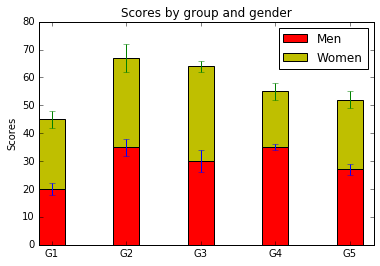

In [3]:

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

[u'D', u's', u'|', u'x', u'_', u'^', u'd', u'h', u'+', u'*', u',', u'o', u'.', u'1', u'p', u'3', u'2', u'4', u'H', u'v', u'8', u'<', u'>']


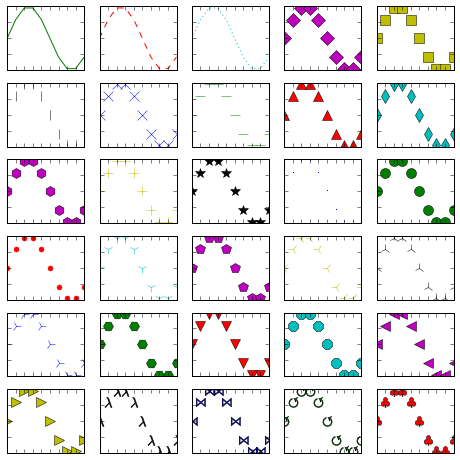

In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

t = np.arange(0.0, 1.0, 0.1)
s = np.sin(2*np.pi*t)
linestyles = ['_', '-', '--', ':']
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass
print markers
styles = markers + [
    r'$\lambda$',
    r'$\bowtie$',
    r'$\circlearrowleft$',
    r'$\clubsuit$',
    r'$\checkmark$']

colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')

plt.figure(figsize=(8,8))

axisNum = 0
for row in range(6):
    for col in range(5):
        axisNum += 1
        ax = plt.subplot(6, 5, axisNum)
        color = colors[axisNum % len(colors)]
        if axisNum < len(linestyles):
            plt.plot(t, s, linestyles[axisNum], color=color, markersize=10)
        else:
            style = styles[(axisNum - len(linestyles)) % len(styles)]
            plt.plot(t, s, linestyle='None', marker=style, color=color, markersize=10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

plt.show()

Number of Baseball Teams


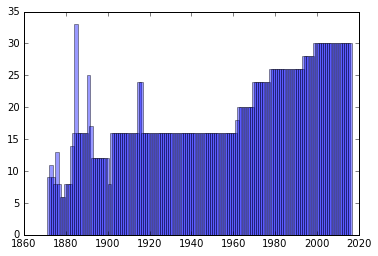

In [5]:
colname='name'
col_df = team_df.groupby(['yearID'])[colname].count()
#a=argmax(col_df.tolist())
#print col_df
#col_df.plot()
print "Number of Baseball Teams"

#left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs
w = 1.8
plt.bar(left = col_df.index.values, height = col_df, width=w, alpha=.4)
plt.show()

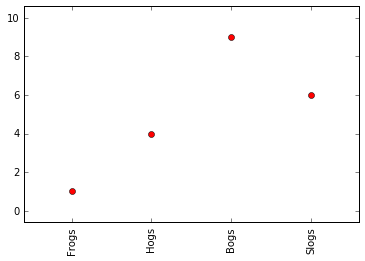

In [6]:
"""
Demo of custom tick-labels with user-defined rotation.
"""
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

     Rank  yearID
202     6    1887
218     6    1888
234     5    1889
256     8    1890
276     8    1891
[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


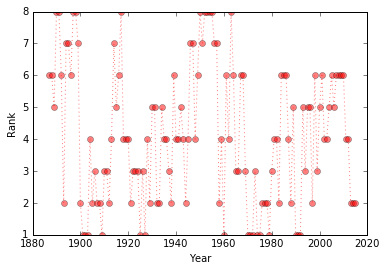

In [7]:
tID='PIT'
team = team_df[team_df['teamID']==tID][['Rank','yearID']]
print team.head()
    #print team.head()

year = team['yearID'].apply(lambda x:pd.Period(x))
year_lab = team['yearID'].tolist()

def numeric(rank):
    if rank >=6 : return 1
    elif rank<=3 : return 3
    else :return 2

#rank = team['Rank'].apply(numeric)
rank = team['Rank']
rank.index = year
#print rank.index
print year_lab
plt.plot(year_lab, rank, marker='o', linestyle=':', alpha=.5, color='r')

#plt.xticks(np.arange(len(year_lab))-80,year_lab, rotation='vertical')
plt.xlabel("Year")
plt.ylabel("Rank")
plt.show()




## Question: trend of number of homeruns


19


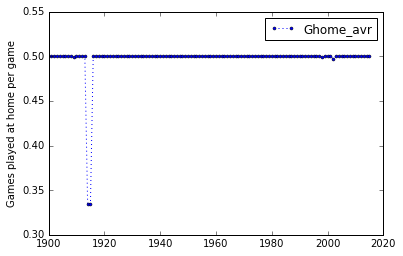

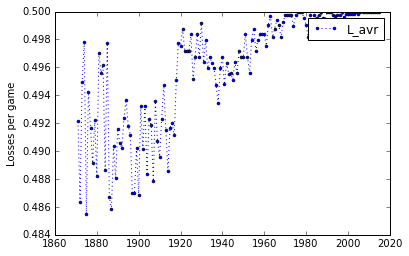

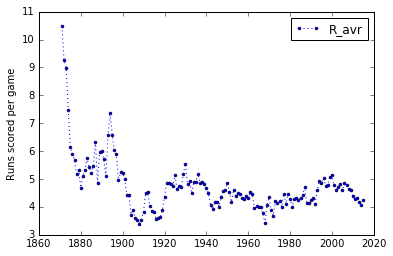

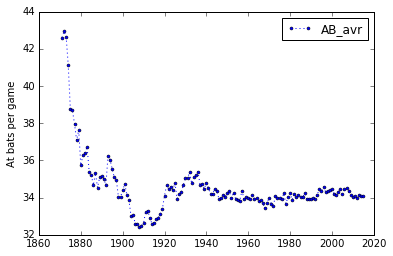

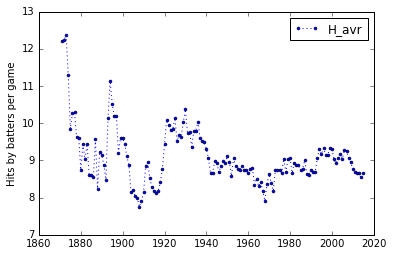

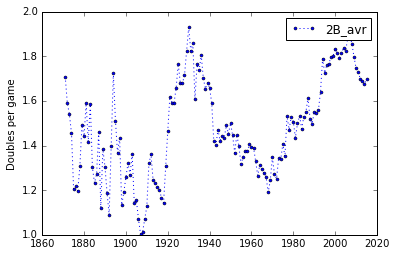

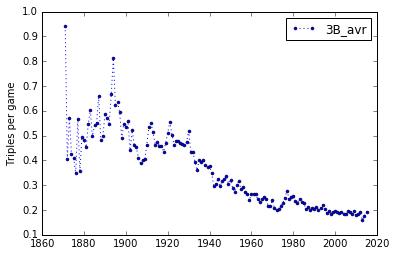

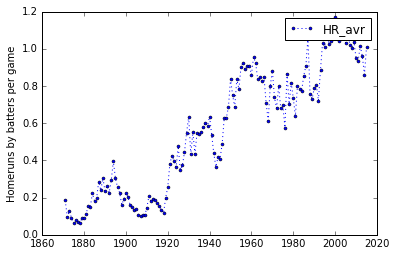

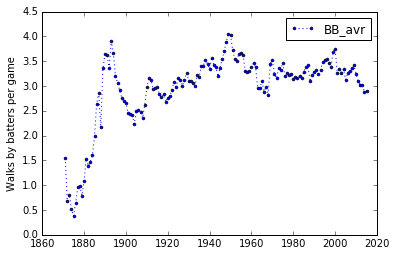

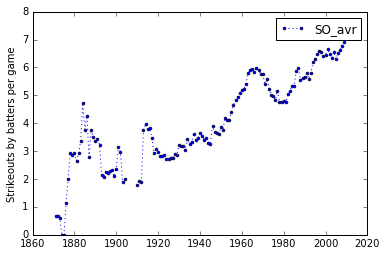

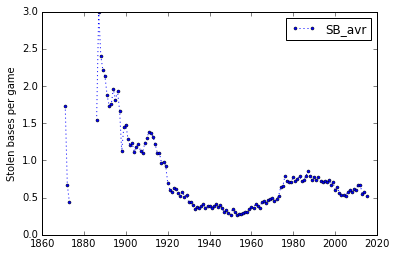

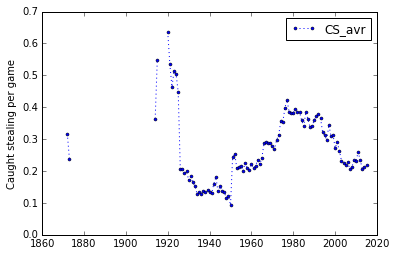

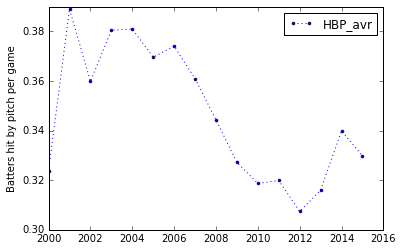

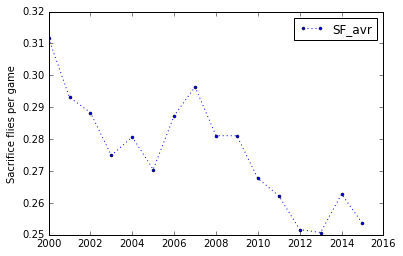

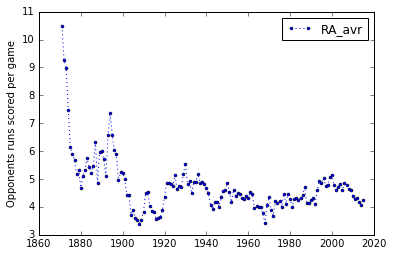

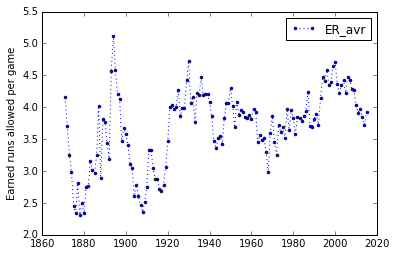

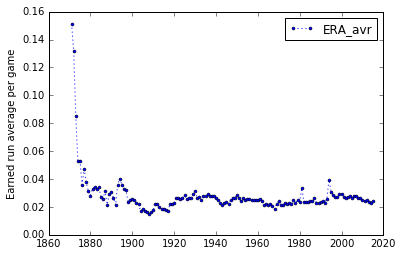

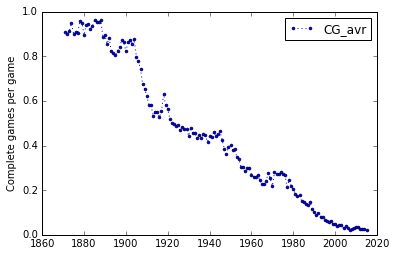

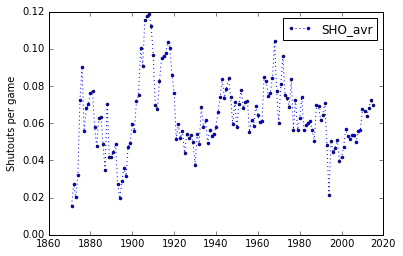

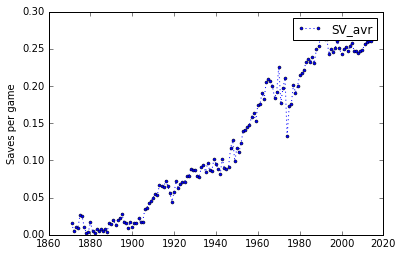

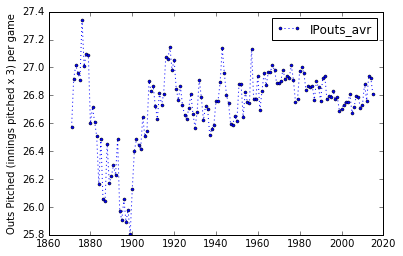

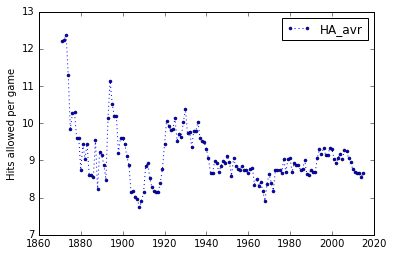

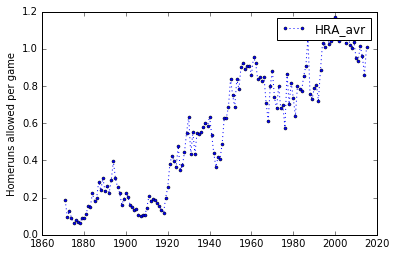

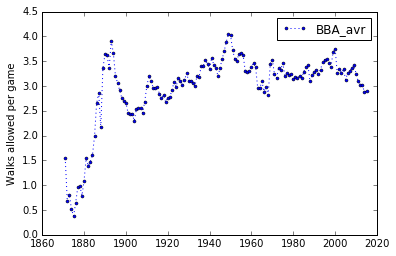

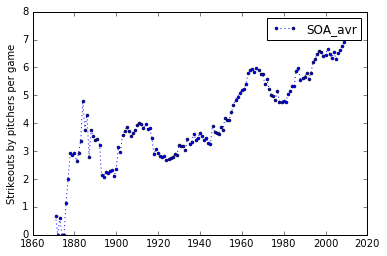

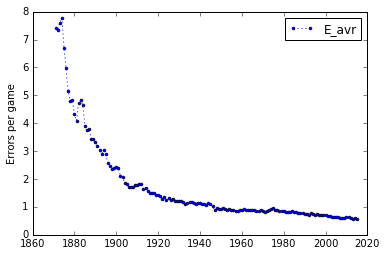

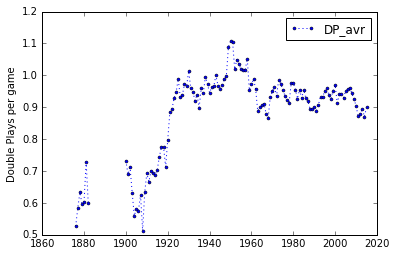

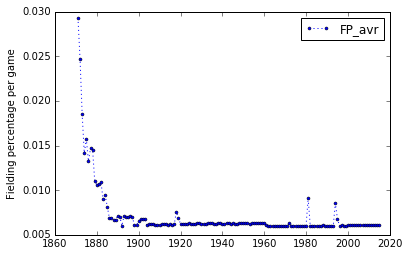

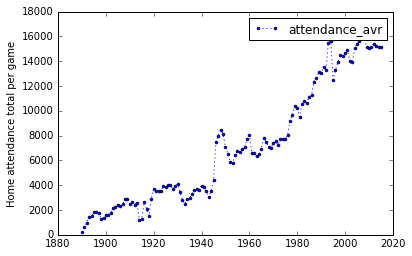

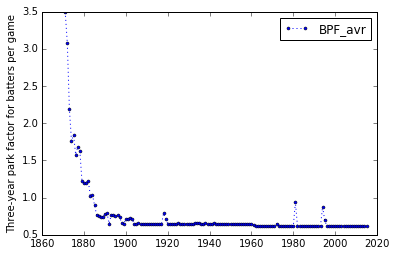

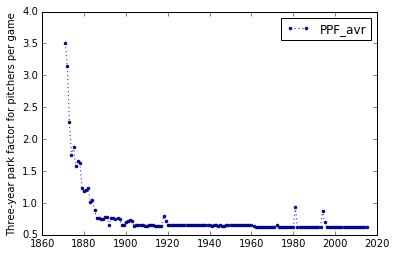

In [8]:
colname = 'HR'

def trend(colname):
    color = ['r','g','y','b','c','k','m']
    
        
    col_df = team_df.groupby(['yearID'])[colname,"G"].sum()
    col_df[colname+'_avr'] = col_df[colname]/col_df["G"]
    x= col_df[colname+'_avr'].index.values
    y= col_df[colname+'_avr']
    plt.plot(x, y, marker='o', markersize=3, linestyle=":")
    plt.ylabel(features_dict[colname]+ ' per game')
    plt.legend()
    plt.show()

    
feature_win = ["WSWin", "DivWin", "LgWin", "WCWin"]
ids = [feature for feature in features_dict.keys() if "ID" in feature and 'year' not in feature]
ids.extend(['name','park'])
time = ['yearID', 'decade']
label = ['label', "Rank", "W", "G"]
no = ["ERA", "FP", "L", "Ghome", "CG", "BPF","PPF", "R",'attendance', "SHO", "ER", "RA", "SA"] # SHO: 

print sum([len(feature_win), len(ids), len(time), len(label)])

data_type=defaultdict(list)
to_exclude = []
to_exclude.extend(feature_win+ids +time+label)    
    
    
for feature in team_df.columns:
    if feature not in to_exclude:
        trend(feature)

In [9]:
x_lab="yearID"
y_lab="SOA"
def total_points(x_lab, y_lab):
    x = team_df[x_lab]
    y = team_df[y_lab]/team_df["G"]
    colors = ['#a6cee3','#1f78b4','#b2df8a','#fdbf6f','#33a02c','#fb9a99','#e31a1c','#ff7f00','#cab2d6']
    leagues = list(set(team_df['lgID']))

    colored = []
    lb_to_color='lgID'
    for row in team_df[lb_to_color]:
        #print row,leagues.index(row), colors[leagues.index(row)]
        colored.append(colors[leagues.index(row)])
    #print Counter(colored)

    plt.scatter(x, y,  linestyle=":", alpha=.2 , label="team")#marker='o', markersize=3, color = colored
    plt.ylabel(features_dict[y_lab]+ ' per game')
    plt.xlabel(features_dict[x_lab])
    plt.legend()
    plt.show()

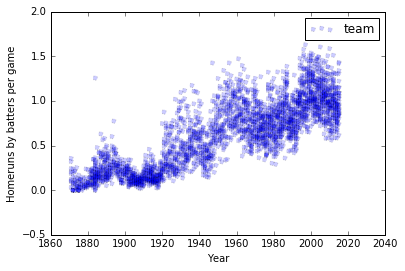

In [10]:
total_points(x_lab="yearID", y_lab="HR")

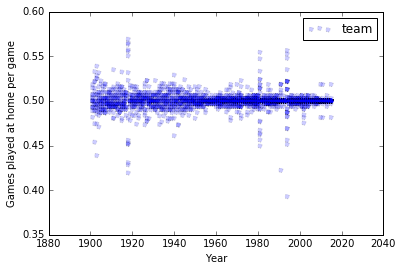

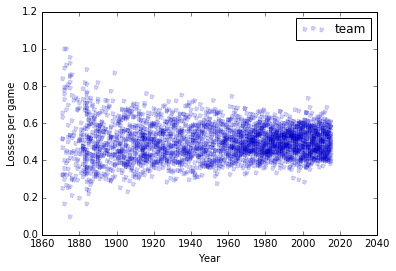

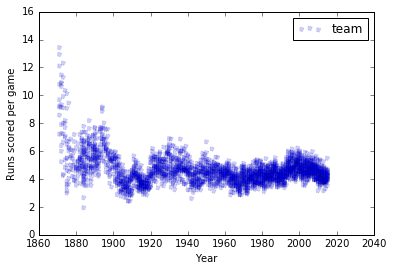

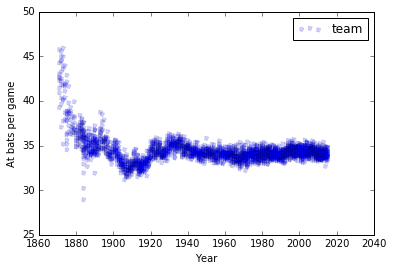

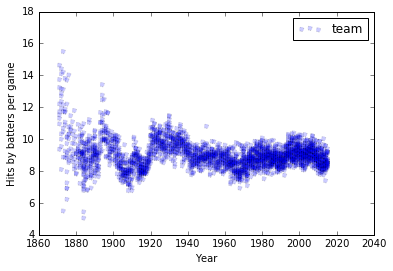

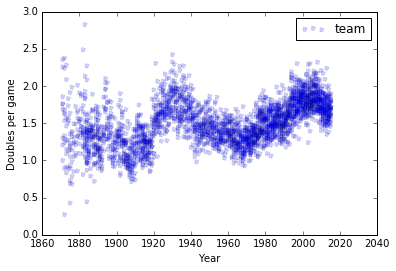

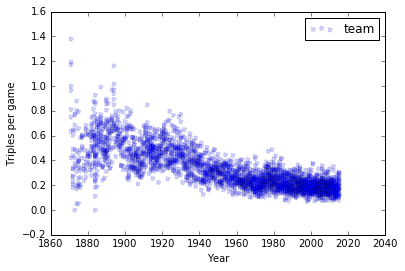

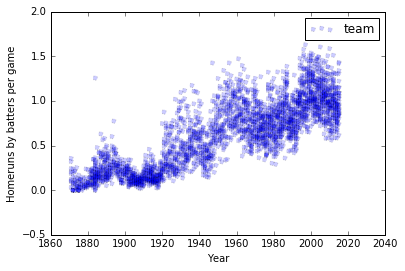

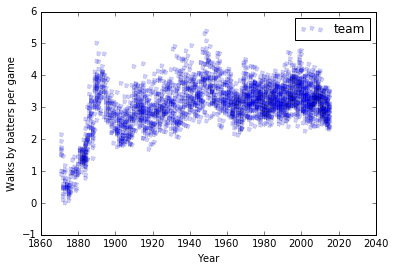

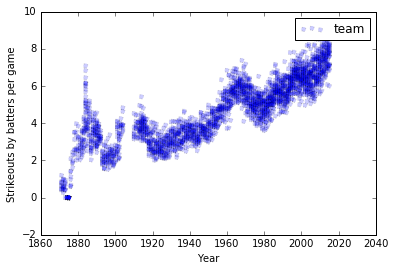

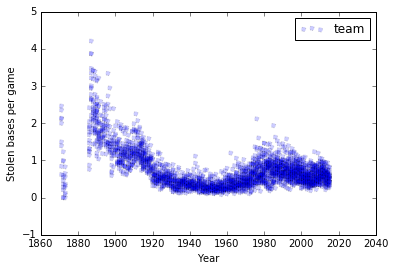

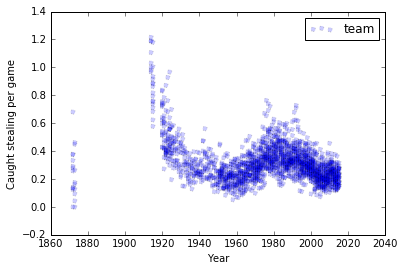

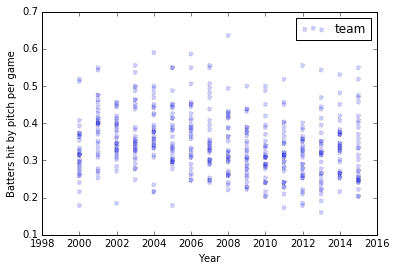

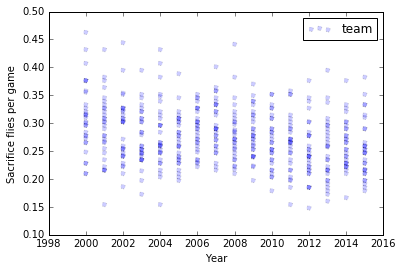

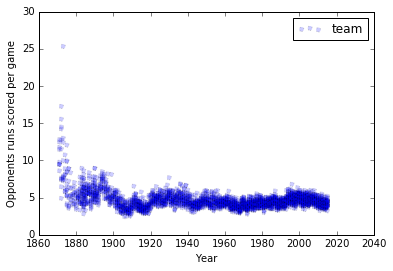

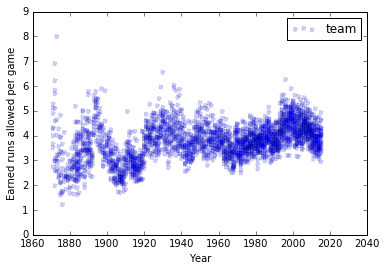

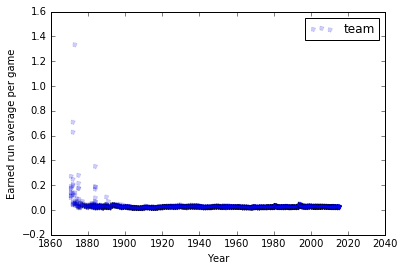

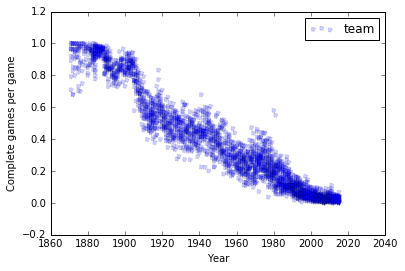

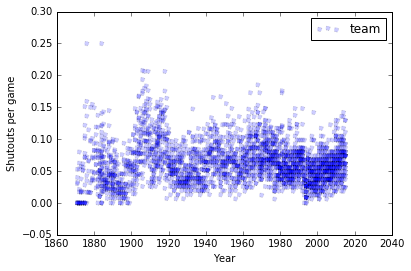

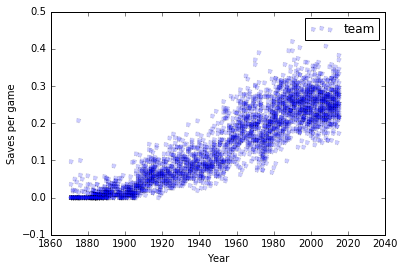

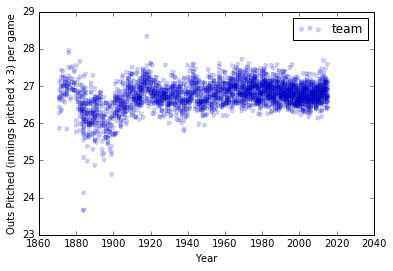

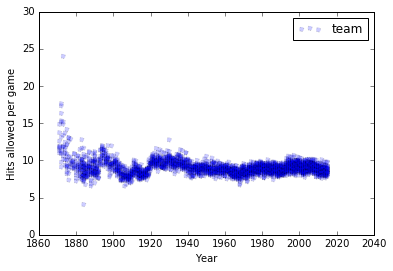

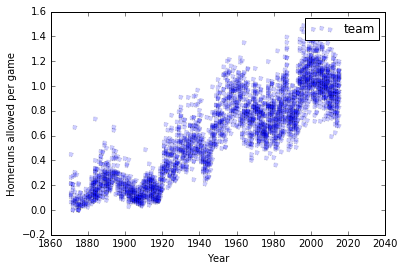

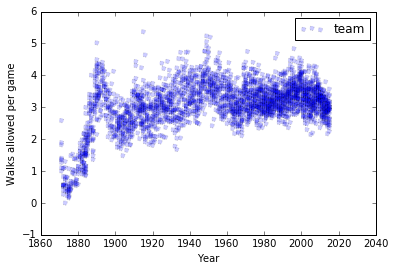

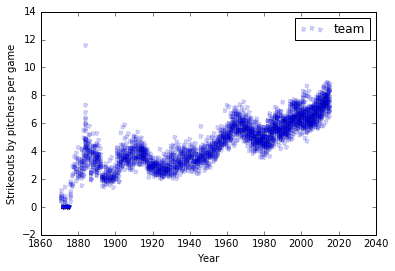

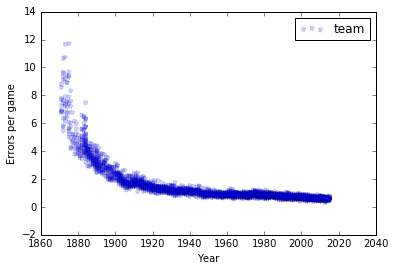

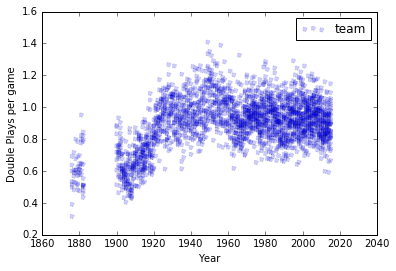

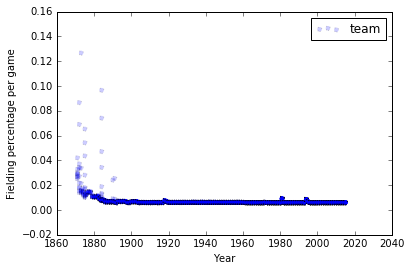

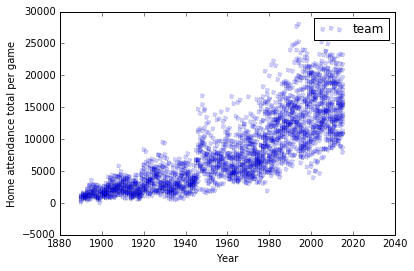

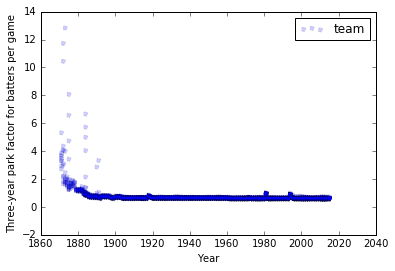

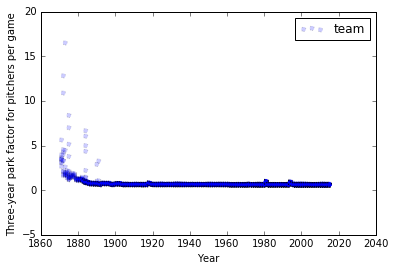

In [11]:
for feature in team_df.columns:
    if feature not in to_exclude:
        total_points(x_lab="yearID", y_lab=feature)


## Question 1: Which teams are big over time?

In [12]:
team_df[['teamID', 'name']]


,teamID,name
0,BS1,Boston Red Stockings
1,CH1,Chicago White Stockings
2,CL1,Cleveland Forest Citys
3,FW1,Fort Wayne Kekiongas
4,NY2,New York Mutuals
5,PH1,Philadelphia Athletics
6,RC1,Rockford Forest Citys
7,TRO,Troy Haymakers
8,WS3,Washington Olympics
9,BL1,Baltimore Canaries


In [13]:
leagues=team_df['lgID'].unique()
for league in leagues:
    print league, type(league)
# "NA" league data points are misloaded as float here.. 
# correct nan to "NA"
team_df['lgID']=team_df['lgID'].apply(lambda x:"NA" if str(x)=='nan' else str(x))

print "----after correct----"
leagues=team_df['lgID'].unique()
for league in leagues:
    print league, type(league)

nan <type 'float'>
NL <type 'str'>
AA <type 'str'>
UA <type 'str'>
PL <type 'str'>
AL <type 'str'>
FL <type 'str'>
----after correct----
NA <type 'str'>
NL <type 'str'>
AA <type 'str'>
UA <type 'str'>
PL <type 'str'>
AL <type 'str'>
FL <type 'str'>


In [14]:
feature_win = ["WSWin", "DivWin", "LgWin", "WCWin"]
#print team_df.groupby("yearID").count()[feature_win]


"""
a= pd.Period('2008')
print  a, a < pd.Period('2010')

a= 2029
print a-a % 10
"""
def transform_in_decade(date):
    to_int = int(date)
    return to_int-to_int%10

def transform_in_boolean(bool):
    if bool in ["Y", "True",1]:
        return 1
    else : 0

# Add feature: label
rank = team_df["Rank"]

def rank(datapoint):
    if datapoint<=2:
        return 'high'
    elif datapoint>=5:
        return 'low'
    else :
        return 'med'
    
team_df["label"] = team_df['Rank'].apply(rank)
features_dict['label']="Ranked Top3 : True otherwise False"

# Add feature: decade
team_df['decade']=team_df['yearID'].apply(transform_in_decade)
features_dict['decade'] = "date in 10 year period"

team_df.head(3)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,label,decade
0,1871,NA,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,med,1870
1,1871,NA,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,high,1870
2,1871,NA,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,low,1870


In [15]:
print team_df[feature_win].head(10)

transformed_win_features = team_df[feature_win].applymap(transform_in_boolean)
print "----after transformation ----"
print transformed_win_features.head(10)

  WSWin DivWin LgWin WCWin
0   NaN    NaN     N   NaN
1   NaN    NaN     N   NaN
2   NaN    NaN     N   NaN
3   NaN    NaN     N   NaN
4   NaN    NaN     N   NaN
5   NaN    NaN     Y   NaN
6   NaN    NaN     N   NaN
7   NaN    NaN     N   NaN
8   NaN    NaN     N   NaN
9   NaN    NaN     N   NaN
----after transformation ----
   WSWin  DivWin  LgWin  WCWin
0    NaN     NaN    NaN    NaN
1    NaN     NaN    NaN    NaN
2    NaN     NaN    NaN    NaN
3    NaN     NaN    NaN    NaN
4    NaN     NaN    NaN    NaN
5    NaN     NaN    1.0    NaN
6    NaN     NaN    NaN    NaN
7    NaN     NaN    NaN    NaN
8    NaN     NaN    NaN    NaN
9    NaN     NaN    NaN    NaN


In [16]:
team_df[feature_win]= transformed_win_features    


a=team_df.groupby(['decade','teamID'])[feature_win].sum()



### the number of entire teams
num_team = len(team_df['teamID'].unique())
print "the number of entire teams: ", num_team

### count number of teams for each league-division
from collections import Counter
league = team_df['lgID']
division = team_df['divID'].apply(lambda x: str(x))
team=team_df['teamID']

league_div_team = pd.DataFrame(Counter(zip(league, division,team)).keys())

league_div_team_cnt = league_div_team.groupby([0,1], as_index=False).count()

#print "columns: ",league_div_team_cnt.columns
league_div_team_cnt.columns=["League", "Division", "Num_of_teams"]

print league_div_team_cnt


the number of entire teams:  149
   League Division  Num_of_teams
0      AA      nan            25
1      AL        C             6
2      AL        E             9
3      AL        W            12
4      AL      nan            17
5      FL      nan             9
6      NA      nan            26
7      NL        C             6
8      NL        E            10
9      NL        W             8
10     NL      nan            37
11     PL      nan             8
12     UA      nan            12


## Big Teams

In [17]:
print type(feature_win)
idx = feature_win+['name']
print idx
#print team_df.columns
team_won=team_df.groupby(['decade','teamID','name'], as_index=False)[feature_win].sum()
#team_won['win'] = team_won['WSWin'] or team_won['DivWin'] or team_won['LgWin']
nrow = team_won.shape[0]
team_won['Win']=[sum(team_won[feature_win].iloc[row,])>0 for row in range(nrow)]
won = team_won[team_won['Win']==True]

#print won[won['decade']>2000]

<type 'list'>
['WSWin', 'DivWin', 'LgWin', 'WCWin', 'name']


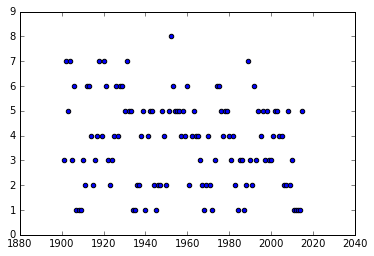

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro', u'label', u'decade'],
      dtype='object')


In [18]:

a= team_df['teamID']=='DET'
a
b= team_df[["name", "yearID","Rank"]][a]
#print b["Rank"]

import matplotlib.pyplot as plt
plt.scatter(x = b["yearID"], y=b["Rank"])
plt.show()
print team_df.columns

In [19]:
%pylab inline
def draw_scatter(x_lb, y_lb, to_scale="CG", df=team_df, sc = 'linear'):
    print x_lb, y_lb
    scaled = df["CG"]
    x = df[x_lb]
    y = df[y_lb]/scaled
    title="Not Scaled"
    
    
    if to_scale:
        scaled = df[to_scale]    
        print scaled[:3]
        x = x/scaled
        y = y/scaled
        title = "Scaled  by %s" %(features_dict[to_scale])
    
    
    col = ['b'  if e <=2 else 'r' for e in df['Rank']]
    print "blue: High Ranked Team(1~3), Red: Low Ranked Team(3~)"
    plt.scatter(x=x , y=y, s=5, color = col, alpha=.2)
    plt.xlabel(features_dict[x_lb])
    plt.ylabel(features_dict[y_lb])
    plt.legend()
    plt.title(title)
    plt.xscale(sc)
    plt.yscale(sc)
    
    plt.show()
    

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


SOA W
0    22
1    25
2    23
Name: CG, dtype: int64
blue: High Ranked Team(1~3), Red: Low Ranked Team(3~)


C:\Program Files\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


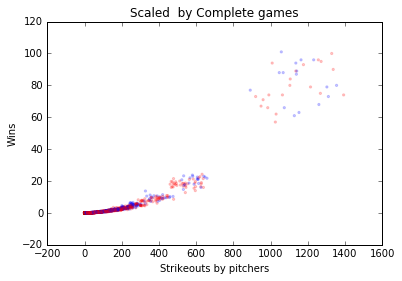

In [20]:
draw_scatter(x_lb='SOA', y_lb='W', to_scale="CG", df=team_df)

In [21]:
to_exclude = feature_win + ["W", "park", "name","Rank","IPOuts"]
features = features_dict.keys()
f = [f for f in features if f not in to_exclude and "ID" not in f ]

print len(f)
print f 

34
['FP', 'BB', 'BPF', 'HR', 'IPouts', 'Ghome', 'ERA', '3B', 'HA', 'HBP', 'DP', 'SOA', 'attendance', 'PPF', 'label', 'RA', 'SHO', 'AB', 'E', 'G', 'H', 'CG', 'L', 'BBA', 'R', '2B', 'CS', 'HRA', 'ER', 'decade', 'SV', 'SO', 'SB', 'SF']


In [22]:
from sklearn.decomposition import RandomizedPCA, PCA
from collections import Counter

In [23]:
feature_win = ["WSWin", "DivWin", "LgWin", "WCWin"]
ids = [feature for feature in features_dict.keys() if "ID" in feature and 'year' not in feature]
ids.extend(['name','park'])
time = ['yearID', 'decade']
label = ['label', "Rank", "W", "G"]
no = ["ERA", "FP", "L", "Ghome", "CG", "BPF","PPF", "R",'attendance', "SHO", "ER", "RA", "SA"] # SHO: 

print sum([len(feature_win), len(ids), len(time), len(label), len(no)])

data_type=defaultdict(list)
to_exclude = []
to_exclude.extend(feature_win+ids +time+label+no)
print len(to_exclude)           

to_PCA = [key for key in features_dict.keys() if key not in to_exclude]
print to_PCA

print team_df.columns

## filter values after 2000Y
"""
features = team_df[to_PCA]#.fillna()
labels = team_df['label']
"""
after_2000_idx = team_df["yearID"]>=2000
features = team_df[to_PCA][after_2000_idx]
labels = team_df[label][after_2000_idx]

#print features.describe()

32
32
['BB', 'HR', 'IPouts', '3B', 'HA', 'HBP', 'DP', 'SOA', 'AB', 'E', 'H', 'BBA', '2B', 'CS', 'HRA', 'SV', 'SO', 'SB', 'SF']
Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro', u'label', u'decade'],
      dtype='object')


In [24]:
## 
print team_df["G"].describe()

### scaling with number of completed games for each row
idx = labels["G"]>0
features = features[idx]
features_scaled = features[idx]*0
labels = labels[idx]
#print labels["W"]
print features.shape, features_scaled.shape

for row in range(features.shape[0]):
    features_scaled.iloc[row,:] = features.iloc[row,:]/(labels['G'].iloc[row])
    labels["W"].iloc[row]= float(labels["W"].iloc[row])/(labels['G'].iloc[row])*100

#print features_scaled.describe()
print features.head(2)
#Counter(labels) 

count    2805.00000
mean      150.34795
std        23.22725
min         6.00000
25%       153.00000
50%       157.00000
75%       162.00000
max       165.00000
Name: G, dtype: float64
(480, 19) (480, 19)


C:\Program Files\Anaconda2\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


       BB   HR  IPouts  3B    HA   HBP     DP   SOA    AB    E     H  BBA  \
2325  608  236    4344  34  1534  47.0  182.0   846  5628  134  1574  662   
2326  535  179    4331  44  1441  59.0  138.0  1220  5527  107  1466  500   

       2B    CS  HRA  SV      SO    SB    SF  
2325  309  52.0  228  46  1024.0  93.0  43.0  
2326  282  44.0  190  38   975.0  97.0  58.0  


In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectPercentile

label_w = labels["W"] #win games/total games
f_train, f_test, l_train, l_test = train_test_split(features_scaled, label_w, test_size=.4)
print f_train.head(3)
print 
print l_train.describe()

            BB        HR     IPouts        3B         HA       HBP        DP  \
2481  3.748466  1.361963  26.374233  0.092025  10.165644  0.380368  0.815951   
2623  3.382716  1.290123  26.870370  0.080247   9.314815  0.277778  1.037037   
2749  2.574074  0.956790  26.685185  0.197531   9.061728  0.370370  1.049383   

           SOA         AB         E         H       BBA        2B        CS  \
2481  5.858896  34.141104  0.638037  8.914110  3.018405  2.055215  0.141104   
2623  7.290123  35.160494  0.469136  9.358025  3.401235  2.092593  0.141975   
2749  7.111111  34.216049  0.660494  8.641975  3.438272  1.722222  0.222222   

           HRA        SV        SO        SB        SF  
2481  1.343558  0.190184  7.993865  0.441718  0.239264  
2623  1.117284  0.154321  6.345679  0.450617  0.302469  
2749  0.864198  0.222222  8.407407  0.524691  0.234568  

count    288.000000
mean      50.263035
std        6.856417
min       33.950617
25%       45.061728
50%       50.617284
75%       55.

## Pearson R

In [26]:
from scipy.stats import pearsonr

p_r_values=[]
colnames = features_scaled.columns

for idx, colname in enumerate(colnames):
    x = features_scaled[colname]
    y = label_w
    p_r, p_val = pearsonr(x, y)
    # if p_val<.05: 
    p_r_values.append(p_r)

print len(p_r_values)
print p_r_values
print
for idx, val in sorted(enumerate(p_r_values), key= lambda x: x[1], reverse =True):
    print "%s - %s, pearson_r: %.4f" %(colnames[idx], features_dict[colnames[idx]], val)   


19
[0.39685497176712614, 0.39272285819228581, 0.47332204066769978, -0.070000297601792119, -0.51623574679398787, 0.16096047083421267, -0.19292856437958514, 0.33208351909104739, 0.16330101020158155, -0.36245714402477719, 0.34168083371870145, -0.44203749542567172, 0.23619241949352054, -0.122298574585709, -0.37616819578522198, 0.65387323097284245, -0.13569271104544262, 0.044606557220659579, 0.29741106761656483]

SV - Saves, pearson_r: 0.6539
IPouts - Outs Pitched (innings pitched x 3), pearson_r: 0.4733
BB - Walks by batters, pearson_r: 0.3969
HR - Homeruns by batters, pearson_r: 0.3927
H - Hits by batters, pearson_r: 0.3417
SOA - Strikeouts by pitchers, pearson_r: 0.3321
SF - Sacrifice flies, pearson_r: 0.2974
2B - Doubles, pearson_r: 0.2362
AB - At bats, pearson_r: 0.1633
HBP - Batters hit by pitch, pearson_r: 0.1610
SB - Stolen bases, pearson_r: 0.0446
3B - Triples, pearson_r: -0.0700
CS - Caught stealing, pearson_r: -0.1223
SO - Strikeouts by batters, pearson_r: -0.1357
DP - Double Pla

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()#normalize =True
reg.fit(f_train, l_train)

print "R squared of trainset: %.5f" %(reg.score(f_train, l_train))
print "R squared of testset: %.5f" %(reg.score(f_test, l_test))

reg.coef_

max_coef=f_train.columns[argmax(reg.coef_)]
print max_coef
features_dict[max_coef]

for idx, coef in sorted(enumerate(reg.coef_), key=lambda x: x[1], reverse=True):
    print coef, colnames[idx], features_dict[colnames[idx]]


R squared of trainset: 0.90377
R squared of testset: 0.89569
SV
39.7598257537 SV Saves
8.31279879898 HR Homeruns by batters
8.20235440524 H Hits by batters
6.46975614655 SF Sacrifice flies
5.72203562628 IPouts Outs Pitched (innings pitched x 3)
2.20908361919 BB Walks by batters
2.20263435703 SB Stolen bases
1.75869771205 HBP Batters hit by pitch
1.35326043176 2B Doubles
0.93410708319 DP Double Plays
-0.146643185775 SO Strikeouts by batters
-0.176016930434 SOA Strikeouts by pitchers
-2.57912310022 E Errors
-3.3706239811 3B Triples
-3.44879607813 BBA Walks allowed
-3.73481209661 HA Hits allowed
-4.93652267423 AB At bats
-5.55485385042 CS Caught stealing
-5.99474961367 HRA Homeruns allowed


Counter({'med': 121, 'high': 102, 'low': 65})
Counter({'high': 90, 'med': 73, 'low': 29}) 

(19L, 19L) 

SO Strikeouts by batters
=====
[  4.36231715e-01   2.03510839e-01   1.20416266e-01   7.08356235e-02
   5.99869982e-02   3.70340207e-02   2.12179026e-02   1.32712031e-02
   1.14692022e-02   6.62284533e-03   5.01592890e-03   3.73423866e-03
   3.07570552e-03   2.54941618e-03   2.25932282e-03   8.98143197e-04
   7.95045825e-04   6.52436266e-04   4.23146765e-04]
[0.43623171521763121, 0.63974255468863284, 0.76015882030292092, 0.83099444379320953, 0.89098144196581786, 0.92801546269554569, 0.9492333652538727, 0.96250456831954445, 0.97397377053445333, 0.98059661586573288, 0.98561254476419069, 0.98934678342538107, 0.99242248895015084, 0.99497190512981759, 0.99723122794702967, 0.99812937114382039, 0.99892441696910927, 0.99957685323468237, 0.99999999999999933]


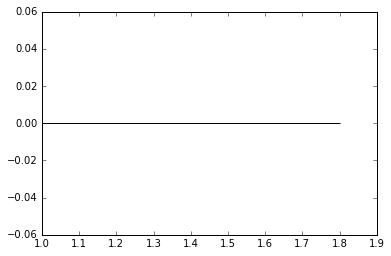

In [29]:
pca = RandomizedPCA() #n_components

label_r = labels["label"]
f_train, f_test, l_train, l_test = train_test_split(features_scaled, label_r, test_size=.4)

print Counter(l_train.tolist())
print Counter(l_test.tolist()), '\n'

f_transformed_train = pca.fit_transform(f_train,l_train)
print pca.components_.shape, '\n' 

print '==============================='
maxIdx=argmax(pca.components_[0])
max_feature = f_train.columns[maxIdx]

print max_feature, features_dict[max_feature]
print '==============================='
pc1= pd.DataFrame(pca.components_[0])
plt.bar(range(1,len(pc1)+1), pc1)
print "====="

var_ratio = pca.explained_variance_ratio_ #print  sum(var_ratio)

var_ratio_cumsum = [0]*len(var_ratio)
for n in range(1,len(var_ratio)):
    var_ratio_cumsum[0]=var_ratio[0]
    var_ratio_cumsum[n]= var_ratio_cumsum[n-1]+var_ratio[n]

print var_ratio        
print var_ratio_cumsum

        
#print f_transformed_train


In [ ]:
%pylab inline

def draw_scatter(x_lb, y_lb, to_scale="G", df=features_scaled, sc = 'linear'):
    print x_lb, y_lb
    x = df[x_lb]
    y = df[y_lb]
    title="Not Scaled"
    
    
    if to_scale:
        scaled = labels[to_scale]    
        print scaled[:3]
        x = x/scaled
        y = y/scaled
        title = "Scaled  by %s" %(features_dict[to_scale])
    
    col=[]
    for e in labels['Rank']:
        if e <=2:
            col.append('b')
        elif e>=5:
            col.append('r')
        else :
            col.append('w')
            
    
    print "blue: High Ranked Team(1~3), Red: Low Ranked Team(3~)"
    plt.scatter(x=x , y=y, s=5, color = col, alpha=.5)
    plt.xlabel(features_dict[x_lb])
    plt.ylabel(features_dict[y_lb])
    plt.legend()
    plt.title(title)
    plt.xscale(sc)
    plt.yscale(sc)
    
    plt.show()

In [ ]:
ncol = features.shape[1]
for i in range(ncol):    
    for j in range(i+1,ncol):
        x_label = features.columns[i]
        y_label = features.columns[j]
        if x_label not in no and y_label not in no:
            draw_scatter(x_lb=x_label, y_lb=y_label, df=features,sc = 'linear')